# Getting Started

This tutorial introduces the basics of automatic differentiation using dual numbers and some useful applications. We'll cover:

1. Basic Derivatives
2. Mathematical Operations and Functions

For more comprehensive mathematical background and theory, see [Mathematical Background](../math.rst). For detailed API documentation, see [API Reference](../api.rst).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dual_autodiff_x as df
from dual_autodiff_x.dual import Dual

dual_autodiff_x package version: 0.0.1


## 1. Basic Derivatives

A dual number is a number of the form $a + bε$ where:
- $a$ is the real part
- $b$ is the dual part
- $ε$ is the dual unit with the property $ε^2 = 0$

When we evaluate a function $f$ on a dual number $a + bε$, we get:

$f(a + bε) = f(a) + f'(a)bε$

This means that the dual part of the result gives us the derivative of the function!

Let's create some dual numbers and examine their properties:

In [2]:
x = Dual(2.0, 1.0)
fx = x**2 + 3 * x + 1
print(f"Value of x^2 + 3x + 1 at x=2: {fx.real}")
print(f"Derivative of x^2 + 3x + 1 at x=2: {fx.dual}")

# if the dual part is not specified, it is set to 1.0 by default
y = Dual(2.0)
fy = y**2 + 3 * y + 1
print(f"Value of y^2 + 3y + 1 at y=2: {fy.real}")
print(f"Derivative of y^2 + 3y + 1 at y=2: {fy.dual}")

Value of x^2 + 3x + 1 at x=2: 11.0
Derivative of x^2 + 3x + 1 at x=2: 7.0
Value of y^2 + 3y + 1 at y=2: 11.0
Derivative of y^2 + 3y + 1 at y=2: 7.0


## 2. Mathematical Operations and Functions

You may have noticed from the previous example that some basic mathematical operations are already supported. For example, `+`, `-`, `*`, `/`, and `**` are all supported.

These operations are supported for dual numbers and scalars, depending on your use case. 

You can realise a constant by setting the dual part to 0, or just use a scalar, which is obviously more recommended. This can be useful for **computing partial derivatives** in the example of next section.

For example:

```python
z = Dual(2.0, 1.0)
c1 = Dual(1.0, 0.0)
c2 = Dual(3.0, 0.0)
c3 = Dual(1.0, 0.0)
fz = z**2 + c2 * z + c3
```
is the same as:
```python
z = Dual(2.0, 1.0)
fz = z**2 + 3 * z + 1
```

You can also use some common mathematical functions, such as `sin`, `cos`, `exp`, and `log`.

Use these operations and functions, we can compute the derivative of some transcendental functions.

Let's see some examples that use these operations and functions to compute the derivative of a function:

f(x) = x³ - 2x² + x


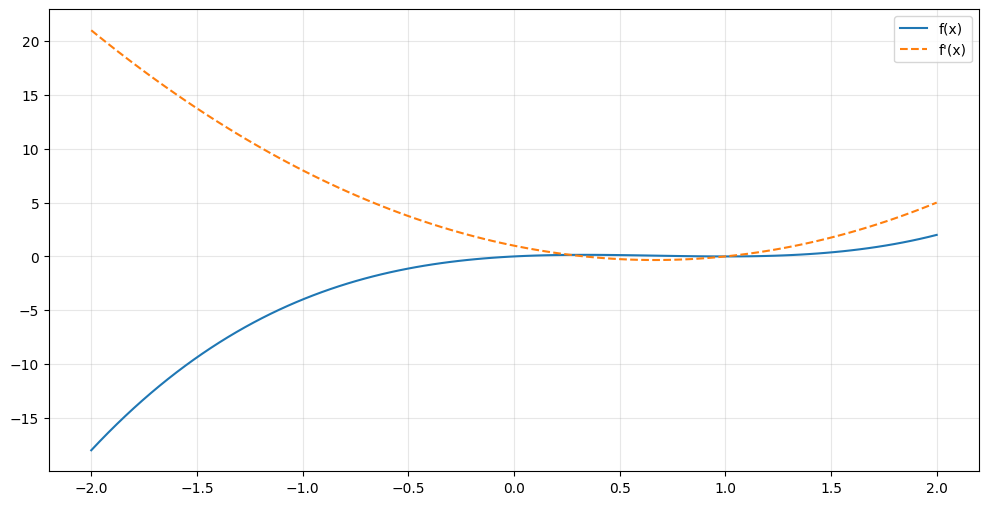


f(x) = sin(2x)e^(-x/2)


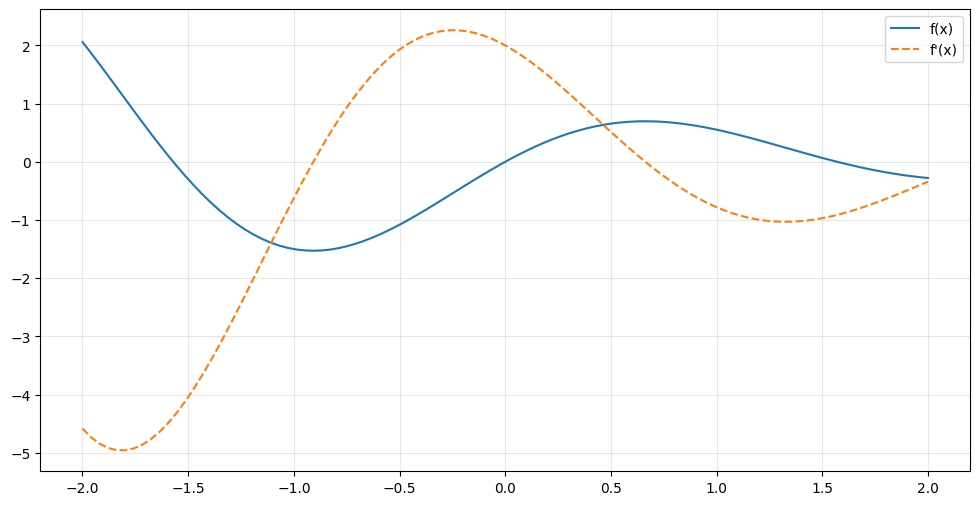


f(x) = x/(1 + x²)


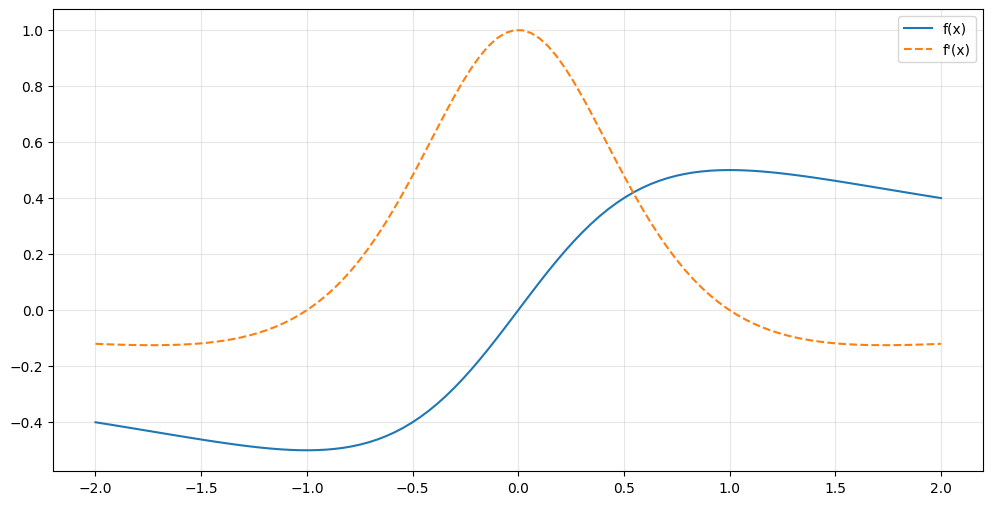

In [3]:
def plot_function_and_derivative(f, x_range=(-2, 2), n_points=100):
    """Plot a function and its derivative computed using dual numbers."""
    x_vals = np.linspace(x_range[0], x_range[1], n_points)
    y_vals = [f(x) for x in x_vals]
    
    # Compute derivatives using dual numbers
    x_duals = [df.Dual(x, 1.0) for x in x_vals]
    results = [f(x) for x in x_duals]
    dy_vals = [r.dual for r in results]
    
    plt.figure(figsize=(12, 6))
    plt.plot(x_vals, y_vals, label='f(x)')
    plt.plot(x_vals, dy_vals, '--', label="f'(x)")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

# Example 1: Polynomial function
def f1(x):
    if isinstance(x, df.Dual):
        return x**3 - 2*x**2 + x
    return x**3 - 2*x**2 + x

print("f(x) = x³ - 2x² + x")
plot_function_and_derivative(f1)

# Example 2: Trigonometric function
def f2(x):
    if isinstance(x, df.Dual):
        return df.Dual.sin(2*x) * df.Dual.exp(-x/2)
    return np.sin(2*x) * np.exp(-x/2)

print("\nf(x) = sin(2x)e^(-x/2)")
plot_function_and_derivative(f2)

# Example 3: Rational function
def f3(x):
    if isinstance(x, df.Dual):
        return x / (1 + x**2)
    return x / (1 + x**2)

print("\nf(x) = x/(1 + x²)")
plot_function_and_derivative(f3)

Do you want to know more usage of dual numbers? See [Applications](../examples/application.rst).